# Catalyst ODE examples

[Catalyst.jl](https://docs.sciml.ai/Catalyst/stable/) is a symbolic modeling package for analysis and high-performance simulation of chemical reaction networks.

## Repressilator

[Repressilator](https://en.wikipedia.org/wiki/Repressilator) model consists of a biochemical reaction network with three components in a negative feedback loop.

In [1]:
using Catalyst
using ModelingToolkit
using OrdinaryDiffEq
using Plots

Define the reaction network

In [2]:
repressilator = @reaction_network begin
    hillr(P₃, α, K, n), ∅ --> m₁
    hillr(P₁, α, K, n), ∅ --> m₂
    hillr(P₂, α, K, n), ∅ --> m₃
    (δ, γ), m₁ ↔ ∅
    (δ, γ), m₂ ↔ ∅
    (δ, γ), m₃ ↔ ∅
    β, m₁ --> m₁ + P₁
    β, m₂ --> m₂ + P₂
    β, m₃ --> m₃ + P₃
    μ, P₁ --> ∅
    μ, P₂ --> ∅
    μ, P₃ --> ∅
end

Model ##ReactionSystem#253:
Unknowns (6): see unknowns(##ReactionSystem#253)
  m₁(t)
  m₂(t)
  m₃(t)
  P₁(t)
  ⋮
Parameters (7): see parameters(##ReactionSystem#253)
  α
  K
  n
  δ
  ⋮

Reactions in the reaction network

In [3]:
reactions(repressilator)

15-element Vector{Catalyst.Reaction}:
 Catalyst.hillr(P₃(t), α, K, n), ∅ --> m₁
 Catalyst.hillr(P₁(t), α, K, n), ∅ --> m₂
 Catalyst.hillr(P₂(t), α, K, n), ∅ --> m₃
 δ, m₁ --> ∅
 γ, ∅ --> m₁
 δ, m₂ --> ∅
 γ, ∅ --> m₂
 δ, m₃ --> ∅
 γ, ∅ --> m₃
 β, m₁ --> m₁ + P₁
 β, m₂ --> m₂ + P₂
 β, m₃ --> m₃ + P₃
 μ, P₁ --> ∅
 μ, P₂ --> ∅
 μ, P₃ --> ∅

State variables in the reaction network

In [4]:
unknowns(repressilator)

6-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 m₁(t)
 m₂(t)
 m₃(t)
 P₁(t)
 P₂(t)
 P₃(t)

Parameters in the reaction network

In [5]:
parameters(repressilator)

7-element Vector{Any}:
 α
 K
 n
 δ
 γ
 β
 μ

To setup parameters (`p`) and initial conditions (`u0`), you can use Julia symbols to map the values.

In [6]:
p = [:α => 0.5, :K => 40, :n => 2, :δ => log(2) / 120, :γ => 5e-3, :β => 20 * log(2) / 120, :μ => log(2) / 60]
u0 = [:m₁ => 0.0, :m₂ => 0.0, :m₃ => 0.0, :P₁ => 20.0, :P₂ => 0.0, :P₃ => 0.0]

6-element Vector{Pair{Symbol, Float64}}:
 :m₁ => 0.0
 :m₂ => 0.0
 :m₃ => 0.0
 :P₁ => 20.0
 :P₂ => 0.0
 :P₃ => 0.0

Or you can also use symbols from the reaction system with the `@unpack` macro (less error prone)

In [7]:
@unpack m₁, m₂, m₃, P₁, P₂, P₃, α, K, n, δ, γ, β, μ = repressilator
p = [α => 0.5, K => 40, n => 2, δ => log(2) / 120, γ => 5e-3, β => 20 * log(2) / 120, μ => log(2) / 60]
u0 = [m₁ => 0.0, m₂ => 0.0, m₃ => 0.0, P₁ => 20.0, P₂ => 0.0, P₃ => 0.0]

6-element Vector{Pair{Symbolics.Num, Float64}}:
 m₁(t) => 0.0
 m₂(t) => 0.0
 m₃(t) => 0.0
 P₁(t) => 20.0
 P₂(t) => 0.0
 P₃(t) => 0.0

Then we can solve this reaction network as an ODE problem

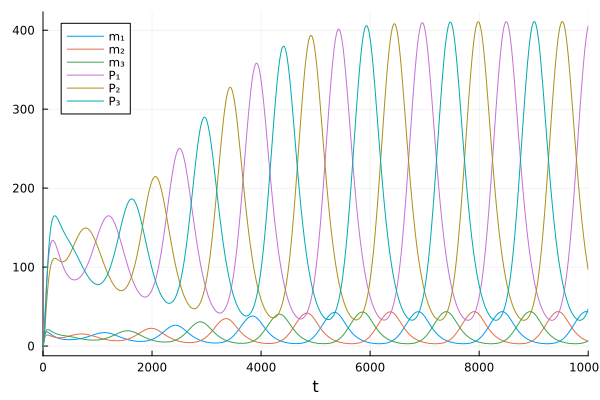

In [8]:
tspan = (0.0, 10000.0)
oprob = ODEProblem(repressilator, u0, tspan, p)
sol = solve(oprob)
plot(sol)

Use extracted symbols for a phase plot

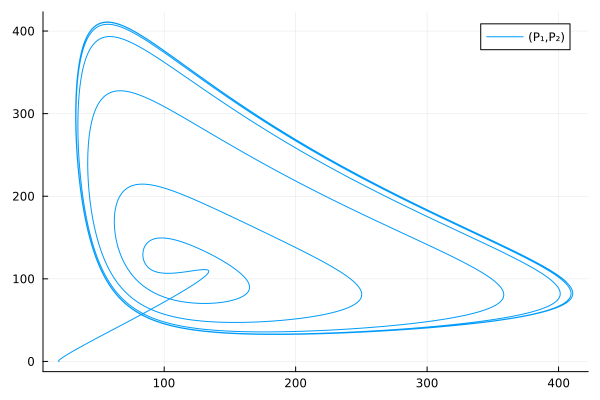

In [9]:
plot(sol, idxs=(P₁, P₂))

## Generating reaction systems programmatically

There are two ways to create a reaction for a `ReactionSystem`:

- `Reaction()` function.
- `@reaction` macro.

The `Reaction(rate, substrates, products)` function builds reactions.

To allow for other stoichiometric coefficients we also provide a five argument form: `Reaction(rate, substrates, products, substrate_stoichiometries, product_stoichiometries)`

In [10]:
using Catalyst
using ModelingToolkit

@parameters α K n δ γ β μ
@variables t
@species m₁(t) m₂(t) m₃(t) P₁(t) P₂(t) P₃(t)

rxs = [
    Reaction(hillr(P₃, α, K, n), nothing, [m₁]),
    Reaction(hillr(P₁, α, K, n), nothing, [m₂]),
    Reaction(hillr(P₂, α, K, n), nothing, [m₃]),
    Reaction(δ, [m₁], nothing),
    Reaction(γ, nothing, [m₁]),
    Reaction(δ, [m₂], nothing),
    Reaction(γ, nothing, [m₂]),
    Reaction(δ, [m₃], nothing),
    Reaction(γ, nothing, [m₃]),
    Reaction(β, [m₁], [m₁, P₁]),
    Reaction(β, [m₂], [m₂, P₂]),
    Reaction(β, [m₃], [m₃, P₃]),
    Reaction(μ, [P₁], nothing),
    Reaction(μ, [P₂], nothing),
    Reaction(μ, [P₃], nothing)
]

15-element Vector{Catalyst.Reaction{Any, Int64}}:
 Catalyst.hillr(P₃(t), α, K, n), ∅ --> m₁
 Catalyst.hillr(P₁(t), α, K, n), ∅ --> m₂
 Catalyst.hillr(P₂(t), α, K, n), ∅ --> m₃
 δ, m₁ --> ∅
 γ, ∅ --> m₁
 δ, m₂ --> ∅
 γ, ∅ --> m₂
 δ, m₃ --> ∅
 γ, ∅ --> m₃
 β, m₁ --> m₁ + P₁
 β, m₂ --> m₂ + P₂
 β, m₃ --> m₃ + P₃
 μ, P₁ --> ∅
 μ, P₂ --> ∅
 μ, P₃ --> ∅

Use `ReactionSystem(reactions, indenpendeent_variable)` to collect these reactions. `@named` macro is used because every system in `ModelingToolkit.jl` needs a name.
`@named x = System(...)` is a short hand for `x = System(...; name=:x)`

In [11]:
@named repressilator = ReactionSystem(rxs, t)

Model repressilator:
Unknowns (6): see unknowns(repressilator)
  m₁(t)
  m₂(t)
  m₃(t)
  P₁(t)
  ⋮
Parameters (7): see parameters(repressilator)
  α
  K
  n
  δ
  ⋮

The `@reaction` macro provides the same syntax in the `@reaction_network` to build reactions.
Note that `@reaction` macro only allows one-way reaction; **reversible arrows are not allowed**.

In [12]:
@variables t
@species P₁(t) P₂(t) P₃(t)

rxs = [
    (@reaction hillr($P₃, α, K, n), ∅ --> m₁),
    (@reaction hillr($P₁, α, K, n), ∅ --> m₂),
    (@reaction hillr($P₂, α, K, n), ∅ --> m₃),
    (@reaction δ, m₁ --> ∅),
    (@reaction γ, ∅ --> m₁),
    (@reaction δ, m₂ --> ∅),
    (@reaction γ, ∅ --> m₂),
    (@reaction δ, m₃ --> ∅),
    (@reaction γ, ∅ --> m₃),
    (@reaction β, m₁ --> m₁ + P₁),
    (@reaction β, m₂ --> m₂ + P₂),
    (@reaction β, m₃ --> m₃ + P₃),
    (@reaction μ, P₁ --> ∅),
    (@reaction μ, P₂ --> ∅),
    (@reaction μ, P₃ --> ∅)
]

@named repressilator2 = ReactionSystem(rxs, t)

Model repressilator2:
Unknowns (6): see unknowns(repressilator2)
  m₁(t)
  m₂(t)
  m₃(t)
  P₁(t)
  ⋮
Parameters (7): see parameters(repressilator2)
  α
  K
  n
  δ
  ⋮

## Conservation laws
We can use conservation laws to eliminate some unknown variables.
For example, in the chemical reaction `A + B <--> C`, given the initial concentrations of A, B, and C, the solver needs to find only one of [A], [B], and [C] instead of all three.

In [13]:
using Catalyst
using ModelingToolkit
using OrdinaryDiffEq
using Plots

In [14]:
rn = @reaction_network begin
    (k₊, k₋), A + B <--> C
end

Model ##ReactionSystem#265:
Unknowns (3): see unknowns(##ReactionSystem#265)
  A(t)
  B(t)
  C(t)
Parameters (2): see parameters(##ReactionSystem#265)
  k₊
  k₋

Set initial condition and parameter values

In [15]:
setdefaults!(rn, [:A => 1.0, :B => 2.0, :C => 0.0, :k₊ => 1.0, :k₋ => 1.0])

Let's convert it to a system of ODEs, using the conservation laws to eliminate two species, leaving only one of them as the state variable.
The conserved quantities will be denoted as `Γ`s

In [16]:
osys = convert(ODESystem, rn; remove_conserved=true) |> structural_simplify

┌ Warning: You are creating a system or problem while eliminating conserved quantities. Please note,
│         due to limitations / design choices in ModelingToolkit if you use the created system to
│         create a problem (e.g. an `ODEProblem`), or are directly creating a problem, you *should not*
│         modify that problem's initial conditions for species (e.g. using `remake`). Changing initial
│         conditions must be done by creating a new Problem from your reaction system or the
│         ModelingToolkit system you converted it into with the new initial condition map.
│         Modification of parameter values is still possible, *except* for the modification of any
│         conservation law constants (Γ), which is not possible. You might
│         get this warning when creating a problem directly.
│ 
│         You can remove this warning by setting `remove_conserved_warn = false`.
└ @ Catalyst ~/.julia/packages/Catalyst/48wH3/src/reactionsystem_conversions.jl:456


Model ##ReactionSystem#265:
Equations (1):
  1 standard: see equations(##ReactionSystem#265)
Unknowns (1): see unknowns(##ReactionSystem#265)
  A(t) [defaults to 1.0]
Parameters (4): see parameters(##ReactionSystem#265)
  Γ[1] [defaults to B(t) - A(t)]
  Γ[2] [defaults to A(t) + C(t)]
  k₋ [defaults to 1.0]
  k₊ [defaults to 1.0]
Observed (2): see observed(##ReactionSystem#265)

Only one (unknown) state variable need to be solved

In [17]:
unknowns(osys)

1-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 A(t)

The other two are constrained by conserved quantities

In [18]:
observed(osys)

2-element Vector{Symbolics.Equation}:
 B(t) ~ A(t) + Γ[1]
 C(t) ~ -A(t) + Γ[2]

Solve the problem

In [19]:
oprob = ODEProblem(osys, [], (0.0, 10.0), [])
sol = solve(oprob, Tsit5())

┌ Warning: Initialization system is overdetermined. 2 equations for 0 unknowns. Initialization will default to using least squares. `SCCNonlinearProblem` can only be used for initialization of fully determined systems and hence will not be used here. To suppress this warning pass warn_initialize_determined = false. To make this warning into an error, pass fully_determined = true
└ @ ModelingToolkit ~/.julia/packages/ModelingToolkit/JpO3W/src/systems/diffeqs/abstractodesystem.jl:1277


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 19-element Vector{Float64}:
  0.0
  0.06602162921791198
  0.16167383723177658
  0.27797398569864795
  0.42472768210212675
  0.5991542465684496
  0.8069250399875878
  1.0494129741596487
  1.3328285260259545
  1.6634553095820483
  2.0523543727756204
  2.514619744984259
  3.073985028187367
  3.7668739415643824
  4.65256513049854
  5.821585305489345
  7.328825483832256
  8.975283435170365
 10.0
u: 19-element Vector{Vector{Float64}}:
 [1.0]
 [0.8836569748526829]
 [0.7588242777314499]
 [0.6540331462534721]
 [0.5681302593629073]
 [0.5062418977317176]
 [0.46461886630918997]
 [0.43937914557022106]
 [0.42544919657534686]
 [0.4186148714289667]
 [0.4156790083953944]
 [0.4146117644861058]
 [0.4142972990536097]
 [0.4142270387749867]
 [0.4142160588486048]
 [0.4142152933849376]
 [0.4142196830866055]
 [0.41425212965225616]
 [0.4142262306892306]

You can still trace the eliminated variable

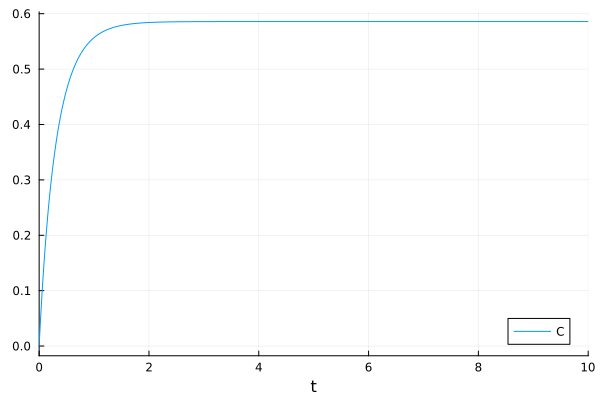

In [20]:
plot(sol, idxs=osys.C)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*